In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def plot_data(output_wave_list, output_flux_list, wave_interpol, photometry):
    # Define the number of rows and columns for the subplots
    n_rows = 2
    n_cols = 3

    # Create the figure and axes
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    axs = axs.ravel()  # Flatten the 2D array of axes for easier indexing

    # Plot data in subplots
    plot_index = 0
    for i in range(len(output_flux_list[0, :])):
        if i % 1250 == 0 and plot_index < len(axs):  # Ensure not exceeding subplot count
            ax = axs[plot_index]
            ax.plot(output_wave_list, output_flux_list[:, i], zorder=1)
            ax.scatter(wave_interpol, photometry[:, i], c='red', zorder=2)
            ax.legend(['Simulated Spectra', 'Photometry'])
            ax.set_xlabel('Wavelength (µm)')
            ax.set_ylabel('Flux')
            ax.set_title(f'Galaxy {plot_index + 1}')
            ax.grid(True)
            plot_index += 1

    # Hide any unused subplots
    for j in range(plot_index, len(axs)):
        axs[j].axis('off')

    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig('synth_6_plots.png', dpi=300, bbox_inches='tight')
    plt.show()

(17, 10000) (17,)


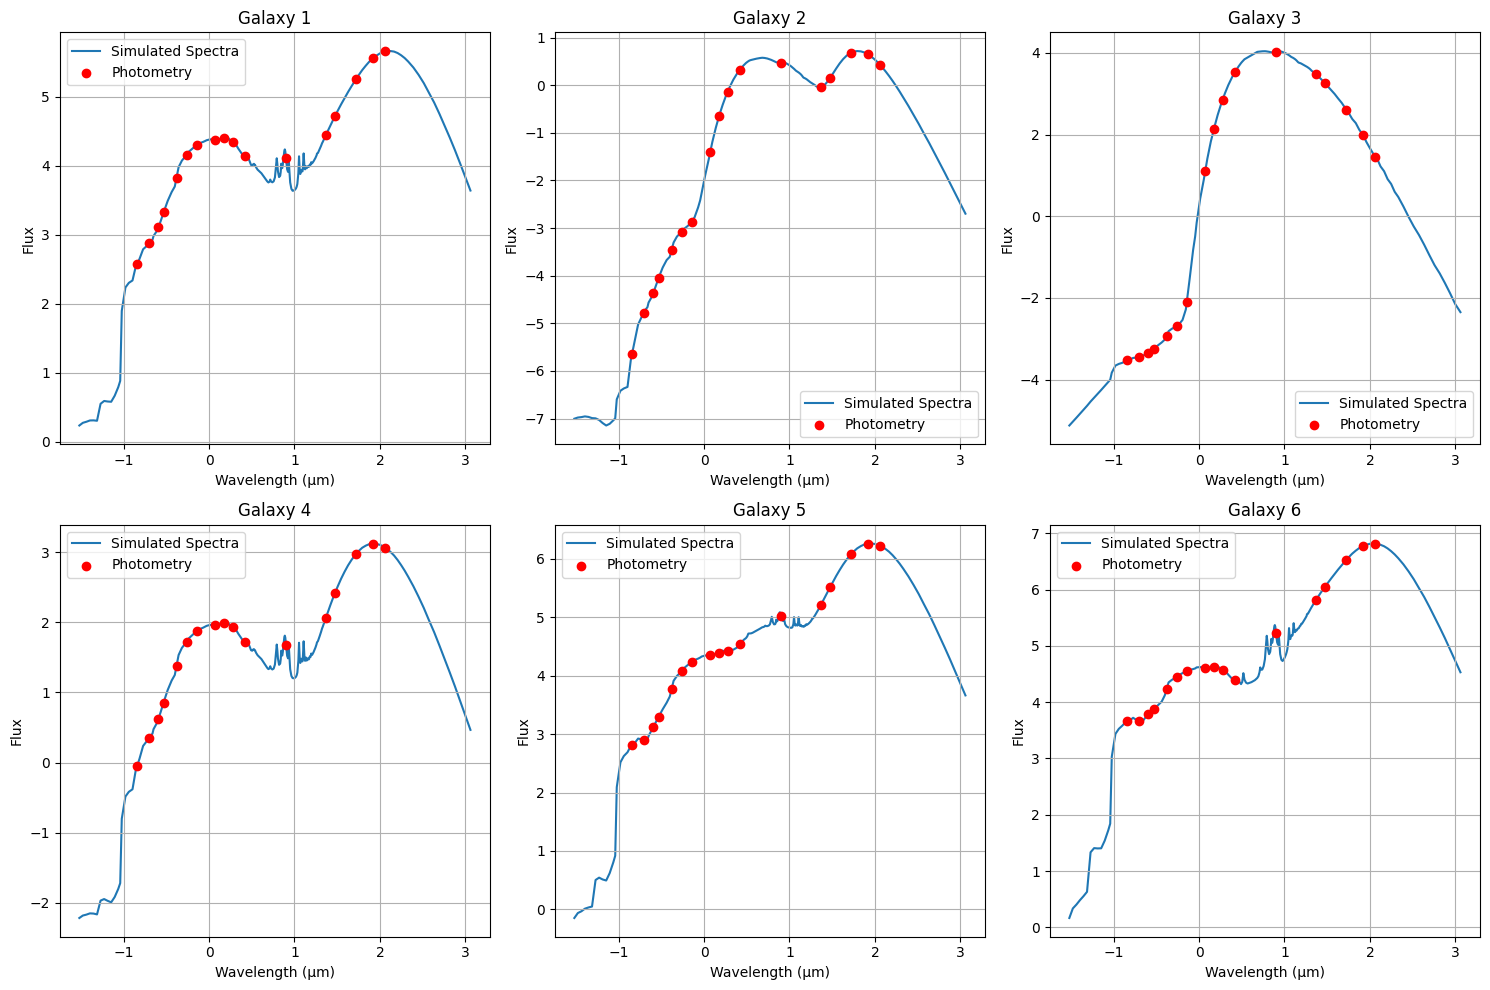

In [3]:
spectra = pd.read_csv('./data/spectra.csv').T
spectra.reset_index(inplace=True)
spectra.columns = range(len(spectra.columns))
spectra = spectra.values.astype(np.float64)
spectra_flux = spectra[:,1:]
spectra_wave = spectra[:,0]

photo = pd.read_csv('./data/interpolated_spectra.csv').T
photo.reset_index(inplace=True)
photo.columns = range(len(photo.columns))
photo = photo.values.astype(np.float64)
photo_flux = photo[:,1:]
photo_wave = photo[:,0]
print(photo_flux.shape, photo_wave.shape)
plot_data(spectra_wave, spectra_flux, photo_wave, photo_flux)